In [ ]:
# -*- coding: utf-8 -*-

#NUBES DE PUNTOS Y MAPAS DE CALOR 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\user\Documents\PYTHON\Python data science y big data\Datos\Indicators_of_Health_Insurance_Coverage.csv",nrows=1000000)
df.dropna(inplace=True, subset=['Value','Low CI','High CI','Group','Indicator'])

sns.set(rc={'figure.figsize':(15,10)})

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


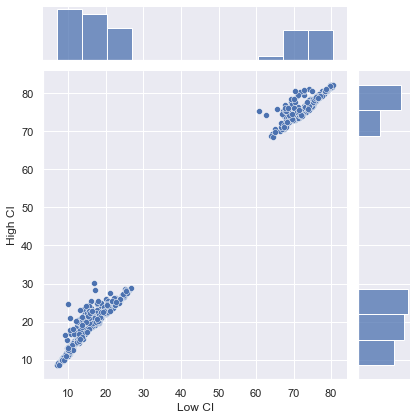

In [3]:
df2 = df[df['Group'].isin(['By Age','By Sex'])].sample(frac=1).head(1000)
sns.jointplot(df2['Low CI'],df2['High CI'])
#Se puede hacer usando los argumentos x='Low CI', y='High CI', data=df2
#Nube de puntos dice si los datos estan muy correlacionados y tambien incluye histogramas que me dicen la distribucion de ambas variables


In [4]:
df3 = df2[np.abs(df2['Low CI'])>9]
df3 = df3[np.abs(df3['High CI'])>9]

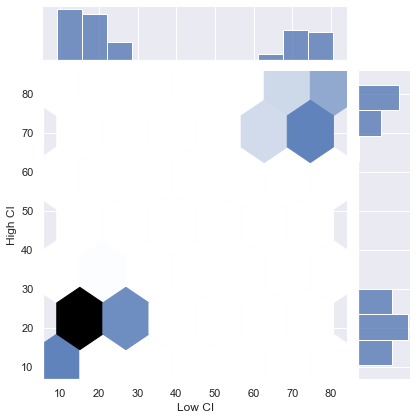

In [5]:
sns.jointplot(x='Low CI', y='High CI', data=df3, kind='hex')
#El parametro kind indica en que forma se presentan las nubes del grafico, en este caso nubes hexagonales

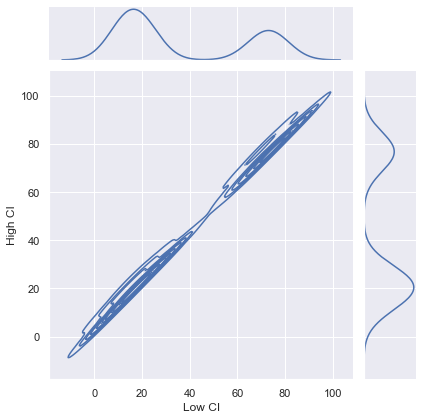

In [6]:
sns.jointplot(x='Low CI', y='High CI', data=df3, kind='kde')
#en este caso kde cambia la grafica de los lados de histogramas a plots de densidad y en vez de nubes presenta curvas de nivel

In [8]:
gb_df=pd.DataFrame(df2.groupby(['Group','Time Period'], as_index=False)['Value'].mean())
gb_df.head()

,Group,Time Period,Value
0,By Age,1,36.591667
1,By Age,2,36.416667
2,By Age,3,36.783333
3,By Age,4,36.708333
4,By Age,5,36.683333


In [9]:
data=gb_df.pivot('Time Period','Group','Value')
data
#Reordena los datos de manera que por cada periodo de tiempo hay un promedio de 'Value' por cada group('By Age','By Sex')

Group,By Age,By Sex
Time Period,,
1,36.591667,36.733333
2,36.416667,36.616667
3,36.783333,36.750000
4,36.708333,36.750000
5,36.683333,36.916667
6,36.566667,36.750000
7,36.441667,36.666667
8,36.433333,36.666667
9,36.525000,36.716667


<AxesSubplot:xlabel='Group', ylabel='Time Period'>

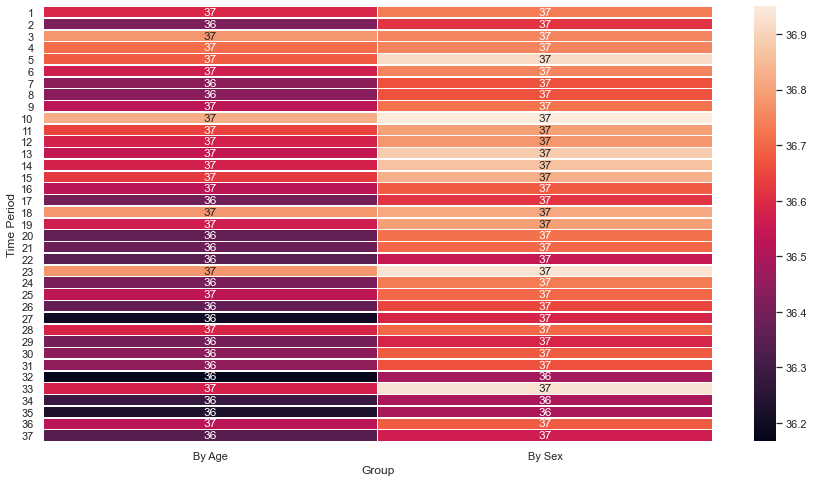

In [10]:
sns.set(rc={'figure.figsize':(15,8)})
#Ajusta el tamaño del grafico
sns.heatmap(data=data,annot=True,linewidths=.5)
#annot muestra los valores en el grafico y linewidth es el tamaño de los cuadros
#Si la variable por la que se agrupa no es ordinal, solo se puede leer el grafico por colores 